In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from torchvision import transforms as T

import torch.optim as optim

from models.s8 import Net
from utils import build_cifar, Trainer, plot_sampledata, plot_misclassified

# Load Data

In [3]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784)),
    ]
)

# Test data transformations
test_transforms = T.Compose(
    [T.ToTensor(), T.Normalize((0.1307,), (0.3081,))]
)

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)


Files already downloaded and verified
Files already downloaded and verified


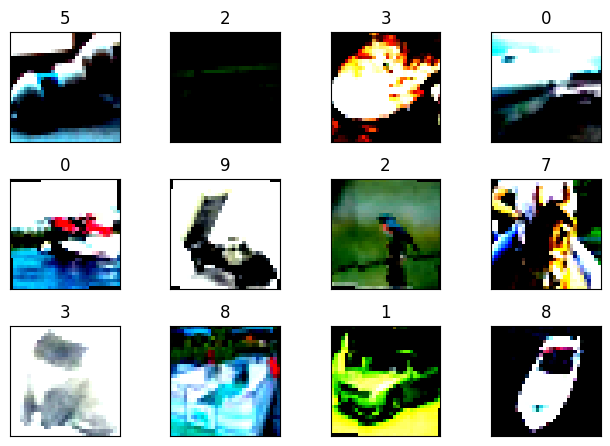

In [4]:
plot_sampledata(train_loader)


In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)

In [11]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─BatchNorm2d: 2-3                  [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─BatchNorm2d: 2-7                  [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [12]:
num_epochs = 20
model = Net(drop=0.025).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.015, epochs=num_epochs, steps_per_epoch=len(train_loader))
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.7122 Batch_id=781 Accuracy=28.03: 100%|██████████| 782/782 [00:58<00:00, 13.35it/s]


Test set: Average loss: 1.9307, Accuracy: 2636/10000 (26.36%)

Epoch 2


Train: Loss=1.5057 Batch_id=781 Accuracy=41.48: 100%|██████████| 782/782 [00:58<00:00, 13.32it/s]


Test set: Average loss: 1.6275, Accuracy: 4086/10000 (40.86%)

Epoch 3


Train: Loss=1.5474 Batch_id=781 Accuracy=49.58: 100%|██████████| 782/782 [01:00<00:00, 12.92it/s]


Test set: Average loss: 1.4048, Accuracy: 5049/10000 (50.49%)

Epoch 4


Train: Loss=1.6648 Batch_id=781 Accuracy=54.62: 100%|██████████| 782/782 [00:58<00:00, 13.29it/s]


Test set: Average loss: 1.1493, Accuracy: 5907/10000 (59.07%)

Epoch 5


Train: Loss=1.1544 Batch_id=781 Accuracy=57.93: 100%|██████████| 782/782 [00:57<00:00, 13.50it/s]


Test set: Average loss: 1.1038, Accuracy: 6059/10000 (60.59%)

Epoch 6


Train: Loss=0.9332 Batch_id=781 Accuracy=59.97: 100%|██████████| 782/782 [01:00<00:00, 12.96it/s]


Test set: Average loss: 1.1140, Accuracy: 6062/10000 (60.62%)

Epoch 7


Train: Loss=1.2120 Batch_id=781 Accuracy=61.75: 100%|██████████| 782/782 [00:58<00:00, 13.29it/s]


Test set: Average loss: 1.0094, Accuracy: 6493/10000 (64.93%)

Epoch 8


Train: Loss=1.3702 Batch_id=781 Accuracy=63.53: 100%|██████████| 782/782 [00:58<00:00, 13.43it/s]


Test set: Average loss: 0.9415, Accuracy: 6690/10000 (66.90%)

Epoch 9


Train: Loss=1.0477 Batch_id=781 Accuracy=64.56: 100%|██████████| 782/782 [00:58<00:00, 13.34it/s]


Test set: Average loss: 0.9670, Accuracy: 6661/10000 (66.61%)

Epoch 10


Train: Loss=1.1500 Batch_id=781 Accuracy=65.33: 100%|██████████| 782/782 [01:00<00:00, 12.92it/s]


Test set: Average loss: 0.8988, Accuracy: 6817/10000 (68.17%)

Epoch 11


Train: Loss=0.7046 Batch_id=781 Accuracy=66.23: 100%|██████████| 782/782 [00:57<00:00, 13.52it/s]


Test set: Average loss: 0.9817, Accuracy: 6552/10000 (65.52%)

Epoch 12


Train: Loss=0.8987 Batch_id=781 Accuracy=66.82: 100%|██████████| 782/782 [00:57<00:00, 13.54it/s]


Test set: Average loss: 0.8580, Accuracy: 6993/10000 (69.93%)

Epoch 13


Train: Loss=0.5586 Batch_id=781 Accuracy=67.95: 100%|██████████| 782/782 [01:00<00:00, 13.02it/s]


Test set: Average loss: 0.8513, Accuracy: 6991/10000 (69.91%)

Epoch 14


Train: Loss=1.3381 Batch_id=781 Accuracy=68.54: 100%|██████████| 782/782 [00:58<00:00, 13.41it/s]


Test set: Average loss: 0.8433, Accuracy: 7086/10000 (70.86%)

Epoch 15


Train: Loss=1.3160 Batch_id=781 Accuracy=69.16: 100%|██████████| 782/782 [01:01<00:00, 12.78it/s]


Test set: Average loss: 0.8099, Accuracy: 7162/10000 (71.62%)

Epoch 16


Train: Loss=1.2305 Batch_id=781 Accuracy=69.81: 100%|██████████| 782/782 [01:00<00:00, 12.92it/s]


Test set: Average loss: 0.7998, Accuracy: 7240/10000 (72.40%)

Epoch 17


Train: Loss=1.0828 Batch_id=781 Accuracy=70.37: 100%|██████████| 782/782 [00:58<00:00, 13.45it/s]


Test set: Average loss: 0.7677, Accuracy: 7346/10000 (73.46%)

Epoch 18


Train: Loss=0.8986 Batch_id=781 Accuracy=70.80: 100%|██████████| 782/782 [00:57<00:00, 13.51it/s]


Test set: Average loss: 0.7380, Accuracy: 7423/10000 (74.23%)

Epoch 19


Train: Loss=1.1342 Batch_id=781 Accuracy=71.53: 100%|██████████| 782/782 [01:00<00:00, 12.92it/s]


Test set: Average loss: 0.7383, Accuracy: 7430/10000 (74.30%)

Epoch 20


Train: Loss=1.2943 Batch_id=781 Accuracy=71.65: 100%|██████████| 782/782 [01:03<00:00, 12.24it/s]


Test set: Average loss: 0.7389, Accuracy: 7435/10000 (74.35%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 71.65@20		71.65
test	 74.35@20		74.35


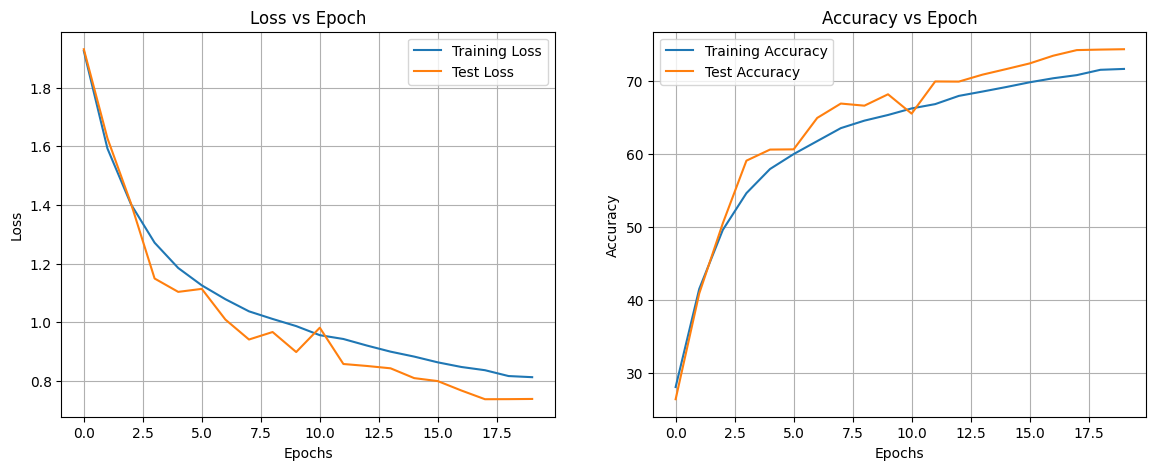

In [13]:
trainer.plot_history()

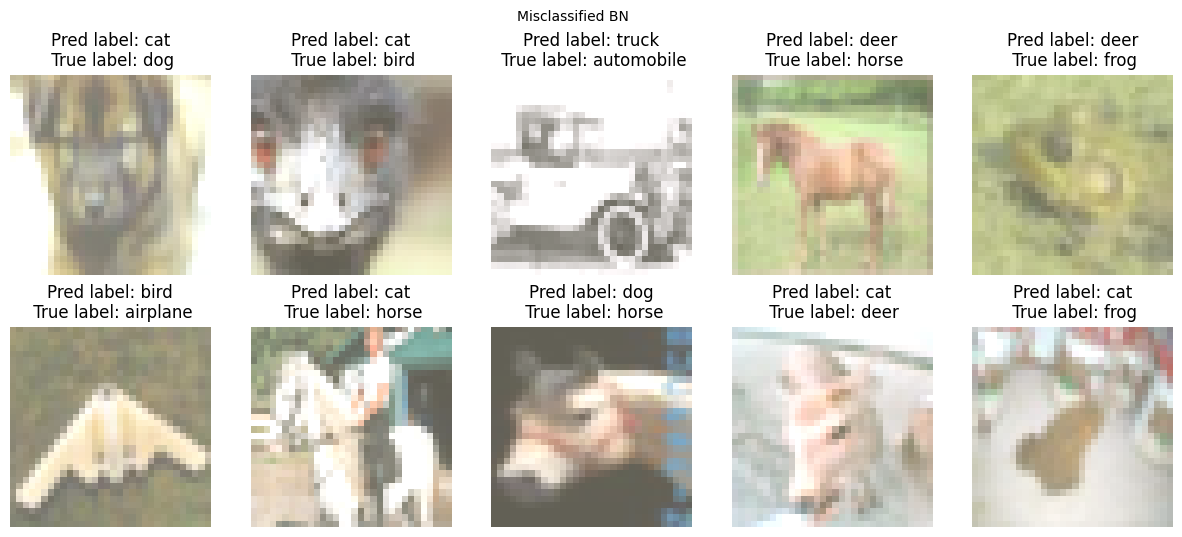

In [18]:
plot_misclassified(model, test_loader, device, (0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))